In [36]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## Sources :
# https://medium.com/hacking-datascience/sqlalchemy-python-tutorial-abcc2ec77b57
# bootcamp 2-9 
## https://towardsdatascience.com/error-bar-plots-from-a-data-frame-using-matplotlib-53026fe95491
## https://medium.com/@danalindquist/https-medium-com-danalindquist-bar-chart-of-weekly-data-count-using-pandas-5c95a536a08e
## https://stackoverflow.com/questions/21310549/list-database-tables-with-sqlalchemy
## https://stackoverflow.com/questions/34421434/pandas-dataframe-area-plot-stacked-false-not-working

In [37]:
import numpy as np
import pandas as pd

In [38]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [39]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
from sqlalchemy import Column, Integer, String

In [40]:
database_path = (
"/Users/amralwakeal/Desktop/Course/Homework/Homework/10-Advanced-Data-Storage-and-Retrieval/Instructions/Resources/hawaii.sqlite"
)

In [41]:
engine = create_engine(f"sqlite:///{database_path}")
conn = engine.connect()

In [42]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [43]:
# view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [44]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [45]:
# Create session (link) from Python to the DB
session = Session(engine)

In [46]:
inspector = inspect(engine)
columns = inspector.get_columns('Measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [47]:
station_df = pd.read_sql_query('''SELECT * FROM Station ''', conn)
station_df.head(10)

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


# Exploratory Climate Analysis

In [48]:
session.query(func.count(Measurement.date)).all()

[(19550)]

In [49]:
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [50]:
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)

Query Date:  2016-08-23


In [51]:
#### whole data querry
results = session.query(Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, 
                        Measurement.tobs).\
    order_by(Measurement.date.desc()).all()
measurement_df = pd.DataFrame(results).sort_values('date', ascending=False)
measurement_df

,id,station,date,prcp,tobs
0,2724,USC00519397,2017-08-23,0.00,81.0
3,19550,USC00516128,2017-08-23,0.45,76.0
1,7635,USC00514830,2017-08-23,0.00,82.0
2,12187,USC00519523,2017-08-23,0.08,82.0
6,19549,USC00516128,2017-08-22,0.50,76.0
...,...,...,...,...,...
19545,9008,USC00518838,2010-01-01,0.21,72.0
19546,9519,USC00519523,2010-01-01,0.15,75.0
19547,12188,USC00519281,2010-01-01,0.15,70.0
19548,14960,USC00511918,2010-01-01,0.05,66.0


In [52]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores

precipitation_2017_df = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-23").\
       group_by(Measurement.date).all()


# Save the query results as a Pandas DataFrame and set the index to the date column
current_df = pd.DataFrame(
    precipitation_2017_df).rename(columns={'date': 'Date', 'prcp': 'Precipitation'}).sort_values('Date').set_index('Date')
current_df

,Precipitation
Date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.00
2017-08-20,0.00
2017-08-21,0.00


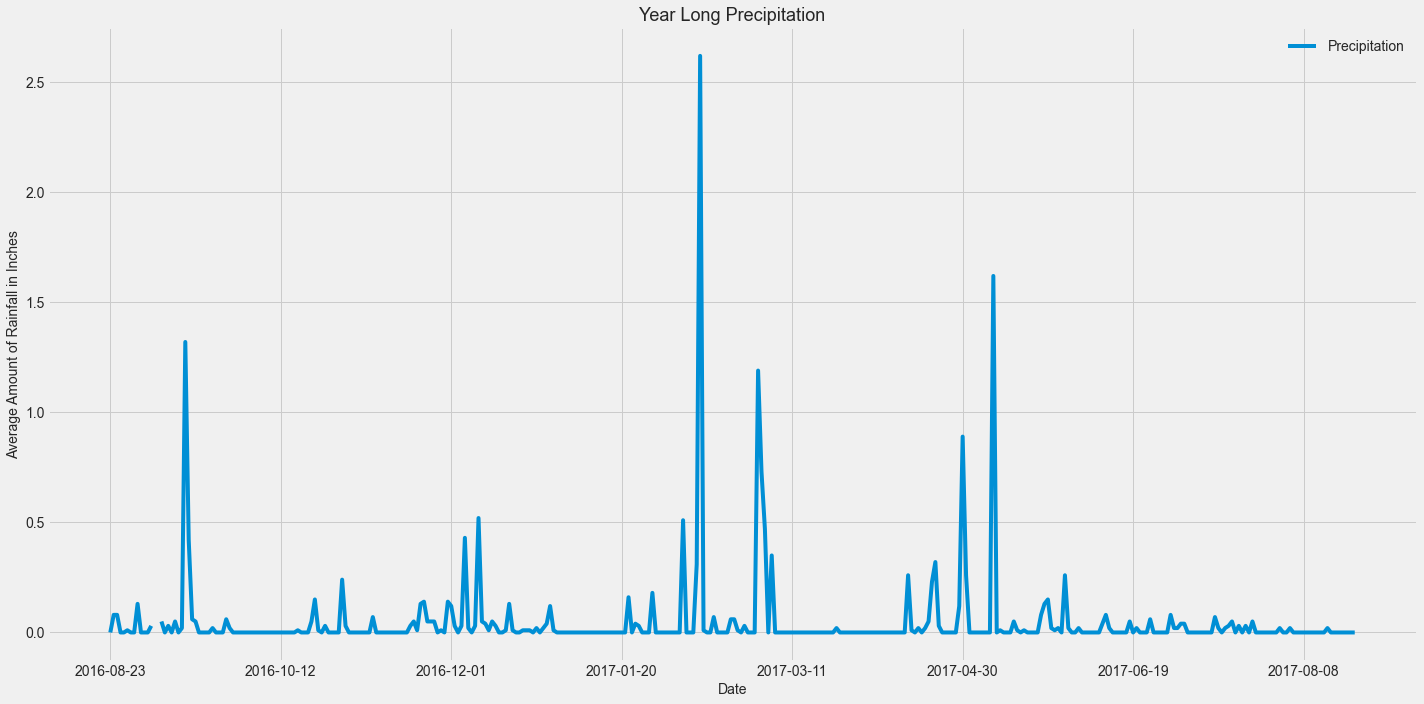

In [53]:
fig, ax = plt.subplots(figsize = (20, 10))
current_df.plot(ax = ax, x_compat = True)
plt.title("Year Long Precipitation", fontsize=18)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Average Amount of Rainfall in Inches", fontsize=14)
plt.tight_layout()
plt.savefig('/Users/amralwakeal/Desktop/Course/Homework/Homework/10-Advanced-Data-Storage-and-Retrieval/Instructions/image/precipitation.png')
plt.show()


In [54]:
# Use Pandas to calcualte the summary statistics for the precipitation data
current_df.describe()

,Precipitation
count,364.000000
mean,0.048709
std,0.204930
min,0.000000
25%,0.000000
50%,0.000000
75%,0.020000
max,2.620000


In [55]:
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [56]:
engine.execute('SELECT * FROM Station LIMIT 9').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [57]:
# Design a query to show how many stations are available in this dataset?
from sqlalchemy import distinct
# count distinct "name" values
unique_stations =  session.query(func.count(distinct(Station.station))).scalar()
print(unique_stations)

9


In [58]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_station = session.query(Measurement.station, func.count(Measurement.tobs)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.tobs).desc()).all()
active_station


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [59]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
station_stat = session.query(Measurement.station, func.min(Measurement.tobs), 
                            func.max(Measurement.tobs), 
                            func.avg(Measurement.tobs)).\
    group_by(Measurement.station).\
    order_by(func.avg(Measurement.tobs).desc()).all()
station_stat

[('USC00514830', 58.0, 85.0, 74.8732970027248),
 ('USC00517948', 58.0, 87.0, 74.68440233236151),
 ('USC00519397', 56.0, 87.0, 74.55323054331865),
 ('USC00519523', 56.0, 85.0, 74.5436493068565),
 ('USC00518838', 58.0, 83.0, 72.72407045009784),
 ('USC00513117', 59.0, 85.0, 72.68918420081211),
 ('USC00519281', 54.0, 85.0, 71.66378066378067),
 ('USC00511918', 53.0, 87.0, 71.61596766043456),
 ('USC00516128', 58.0, 84.0, 70.91500765696784)]

In [60]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_station = session.query(
    Measurement.station, 
    Measurement.date, 
    Measurement.tobs
).filter((Measurement.station == 'USC00519281'), 
       Measurement.date >= "2016-08-23").all()
temp_station

[('USC00519281', '2016-08-23', 77.0),
 ('USC00519281', '2016-08-24', 77.0),
 ('USC00519281', '2016-08-25', 80.0),
 ('USC00519281', '2016-08-26', 80.0),
 ('USC00519281', '2016-08-27', 75.0),
 ('USC00519281', '2016-08-28', 73.0),
 ('USC00519281', '2016-08-29', 78.0),
 ('USC00519281', '2016-08-30', 77.0),
 ('USC00519281', '2016-08-31', 78.0),
 ('USC00519281', '2016-09-01', 80.0),
 ('USC00519281', '2016-09-02', 80.0),
 ('USC00519281', '2016-09-03', 78.0),
 ('USC00519281', '2016-09-04', 78.0),
 ('USC00519281', '2016-09-05', 78.0),
 ('USC00519281', '2016-09-06', 73.0),
 ('USC00519281', '2016-09-07', 74.0),
 ('USC00519281', '2016-09-08', 80.0),
 ('USC00519281', '2016-09-09', 79.0),
 ('USC00519281', '2016-09-10', 77.0),
 ('USC00519281', '2016-09-11', 80.0),
 ('USC00519281', '2016-09-12', 76.0),
 ('USC00519281', '2016-09-13', 79.0),
 ('USC00519281', '2016-09-14', 75.0),
 ('USC00519281', '2016-09-15', 79.0),
 ('USC00519281', '2016-09-16', 78.0),
 ('USC00519281', '2016-09-17', 79.0),
 ('USC005192

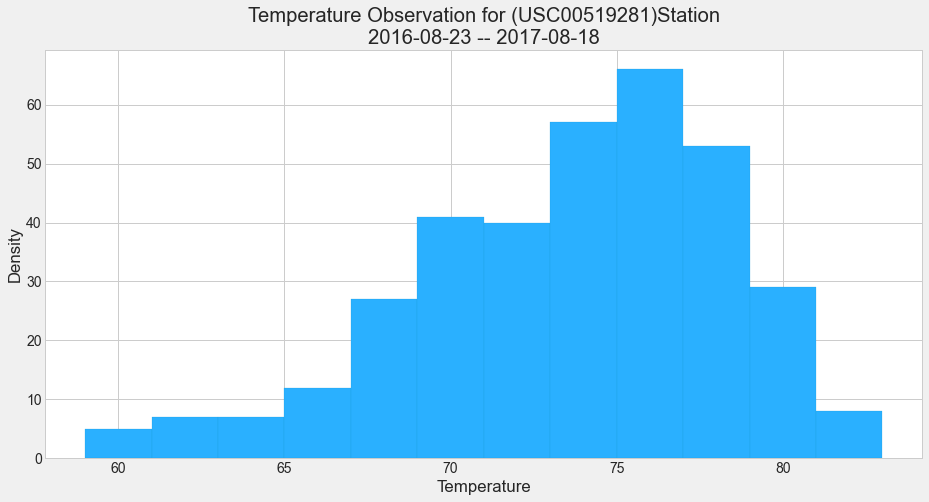

In [61]:
# create a histogram
# 1. create df 
hist_df = pd.DataFrame(temp_station).rename(
    columns={'station': 'Station', 'date': 'Date', 'tobs': 'Temperature'})
# plot histogram for temperature 
# assign x & y 
x = hist_df['Temperature']
plt.figure(figsize=(14,7)) 
plt.style.use('seaborn-whitegrid') # nice and clean grid
plt.hist(x, bins=12, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.2)


plt.title('Temperature Observation for (USC00519281)Station\n'
         '2016-08-23 -- 2017-08-18') 
plt.xlabel('Temperature') 
plt.ylabel('Density') 
plt.savefig('/Users/amralwakeal/Desktop/Course/Homework/Homework/10-Advanced-Data-Storage-and-Retrieval/Instructions/image/temp.png')

plt.show()

In [62]:
measurement_df['date']= pd.to_datetime(measurement_df['date']) 
measurement_df['month'] = measurement_df['date'].dt.month
measurement_df['year'] = measurement_df['date'].dt.year
measurement_df[['date','month', 'year']].head()

,date,month,year
0,2017-08-23,8,2017
3,2017-08-23,8,2017
1,2017-08-23,8,2017
2,2017-08-23,8,2017
6,2017-08-22,8,2017


In [63]:
june_reading = measurement_df[measurement_df['month'] == 6].groupby(['year']).agg({'tobs':'mean'})
december_reading = measurement_df[measurement_df['month'] == 12].groupby(['year']).agg({'tobs':'mean'})
june_reading.shape
print("June" + str(june_reading.shape))
print("December" + str(december_reading.shape))

June(8, 1)
December(7, 1)


In [64]:
## sample length is different between June "N = 8" & December "N = 7"
## Paired ttest is not feasible so we should use the unpaired t test

In [65]:
import numpy as np
from scipy import stats

In [66]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [67]:
### Unpaired t test
welchs = stats.ttest_ind(june_reading['tobs'], december_reading['tobs'], equal_var=False)
welchs.pvalue / 2

7.259415188219366e-06

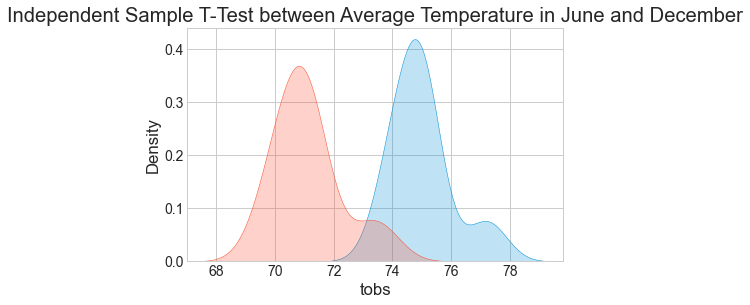

In [68]:
sns.kdeplot(june_reading['tobs'], shade=True)
sns.kdeplot(december_reading['tobs'], shade=True)

plt.title("Independent Sample T-Test between Average Temperature in June and December")
plt.savefig('/Users/amralwakeal/Desktop/Course/Homework/Homework/10-Advanced-Data-Storage-and-Retrieval/Instructions/image/ttest.png')


## Bonus Challenge Assignment

In [69]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [71]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
trip_date = '2018-07-28 to \n 2018-08-07'
trip_temp = calc_temps('2017-07-28', '2017-08-07')
# for your trip using the previous year's data for those same dates.
trip_tmin = trip_temp[0][0]
trip_tavg = trip_temp[0][1]
trip_tmax = trip_temp[0][2]



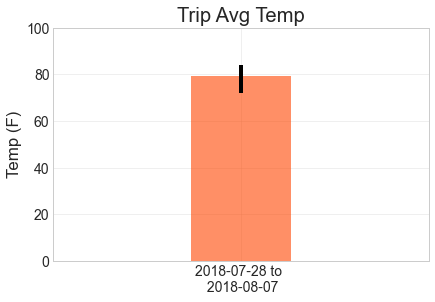

In [72]:
# Plot the results from your previous query as a bar chart. 

# Use the average temperature for the y value
minError = trip_tavg - trip_tmin
maxError = trip_tmax - trip_tavg

# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
errorbar = np.array([[minError], [maxError]])

plt.bar(trip_date, trip_tavg, yerr=errorbar, color = 'orangered', alpha = .6)
plt.ylim(0, 100)
plt.xlim(-1.5, 1.5)

# Use "Trip Avg Temp" as your Title

plt.title('Trip Avg Temp')
plt.ylabel('Temp (F)')
plt.grid(alpha=.3)
plt.savefig('/Users/amralwakeal/Desktop/Course/Homework/Homework/10-Advanced-Data-Storage-and-Retrieval/Instructions/image/tripavg_temp.png')


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [73]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [177]:
# calculate the daily normals for your trip
from dateutil.parser import parse
# String to Date:

# Date to String:
# push each tuple of calculations into a list called `normals`
# Set the start and end date of the trip
start_day = parse('2018-07-28')
end_day = parse('2018-08-07')

# Use the start and end date to create a range of dates
trip_range = pd.date_range(start='2018-07-28', end='2018-08-07', freq='D')
trip_days = trip_range.strftime('%m-%d')

# Stip off the year and save a list of %m-%d strings
# Loop through the list of %m-%d strings and calculate the normals for each date
daily_temp = []
for x in trip_days: 
    daily_temp.append(*daily_normals(x))
#daily_temp.append(daily_normals(x))
trip_df = pd.DataFrame(daily_temp, columns=['Min', 'AVG', 'Max'])
trip_df['Date'] = trip_days
trip_df.set_index('Date')

,Min,AVG,Max
Date,,,
07-28,69.0,76.464286,82.0
07-29,69.0,76.470588,83.0
07-30,69.0,77.351852,84.0
07-31,72.0,77.035714,83.0
08-01,67.0,75.540000,83.0
08-02,68.0,75.603774,84.0
08-03,70.0,76.611111,85.0
08-04,69.0,76.711538,84.0
08-05,69.0,76.148148,82.0


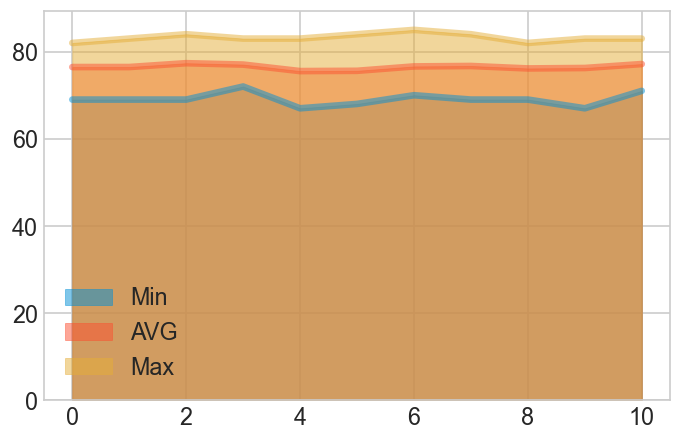

In [194]:
# Plot the daily normals as an area plot with `stacked=False`
fig, ax = plt.subplots(dpi=120)
trip_df.plot(kind='area', ax=ax, stacked=False)
plt.savefig('/Users/amralwakeal/Desktop/Course/Homework/Homework/10-Advanced-Data-Storage-and-Retrieval/Instructions/image/daily_normals.png')
plt.show()